In [67]:
import requests
import sqlite3
import time
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymorphy2
from nltk.corpus import stopwords
from collections import Counter

In [64]:
endpoint = 'api.vk.com/method'
method = 'wall.get'
token = '6e4d0ec06e4d0ec06e4d0ec0a46e271b4a66e4d6e4d0ec032f4cd3c48768e41b63718b7'
params = 'domain=thevyshka&count=100'
offset = 0

In [65]:
posts = []
while True:
  url = "https://{ep}/{method}?{ps}&offset={os}&v=5.52&access_token={token}".format(ep=endpoint, method=method, token=token, ps=params, os=offset)
  result = requests.get(url).json()
  count = result['response']['count']
  posts.extend(result['response']['items'])

  offset += 100
  if count <= offset:
    break

In [193]:
def lemmatize(text):
    mystem = pymystem3.Mystem()
    splitted = splittext(text)
    lem_text = ''
    for i in range(0, len(splitted)):
        lem_text = lem_text + ' ' + mystem.lemmatize(z[i])[0]

In [7]:
def splittext(text):
    trash = '''.,!;:'"—[({+—_\/=*#№})]«»'''
    for s in trash:
        text = text.replace(s, '')
    splitted = text.lower().split()
    return splitted

def savetext(folder, name, text):
    try:
        os.mkdir('{}'.format(folder))
    except FileExistsError:
        pass
    with open('{}\{}.txt'.format(folder, name), 'w', encoding='utf-8') as f:
        f.write(text)

parameter3 = has_photo, parameter4 = len(about) (in symbols)

In [93]:
def work_with_comments(comment, post_id):
    com_id = comment['id']
    from_id = comment['from_id']
    unix_timestamp  = comment['date']
    utc_time = time.gmtime(unix_timestamp)
    local_time = time.localtime(unix_timestamp)
    com_time = time.strftime('%Y-%m-%d %H:%M:%S', local_time)
    date = com_time[:10]
    ctime = com_time[11:]
    try:
        reply = comment['reply_to_comment']
    except KeyError:
        reply = 0
    c.execute('INSERT INTO comment VALUES ({com_id}, {post_id}, {from_id}, "{date}", "{ctime}", {reply})'.format(
    com_id=com_id, post_id=post_id, from_id=from_id, date=date, ctime=ctime, reply=reply))
    text = comment['text']
    if text == '':
        length = 0
    else:
        length = len(splittext(text))
        savetext('comments', str(com_id), text)
    user_method = 'users.get'
    url = 'https://{ep}/{method}?user_ids={from_id}&fields=has_photo,about&v=5.52&access_token={token}'.format(
        ep=endpoint, method=user_method, from_id=from_id, token=token, os=offset)
    result = requests.get(url).json()
    if result['response'] != []:
        photo = result['response'][0]['has_photo']
        try:
            about = len(result['response'][0]['about'])
        except KeyError:
            about = 0
    else:
        photo = 2
        about = -1
    return length, photo, about
    

In [96]:
base = sqlite3.connect('data.db')
c = base.cursor()

In [97]:
c.execute('''CREATE TABLE IF NOT EXISTS post(id integer, from_id integer, date string,
          time string, comments integer, likes integer, reposts integer)''')
c.execute('''CREATE TABLE IF NOT EXISTS comment(id integer, to_post integer, from_id integer, date string, 
          time string, reply string)''')

parameter1 = year;
parameter2 = likes

In [98]:
owner_id = '-66036248'
method = 'wall.getComments'
lengths = []
years = []
likes = []
meancomlengths = []
comlengths = []
photos = []
abouts = []
for post in posts:
    post_id = post['id']
    from_id = post['from_id']
    text = post['text']
    if text == '':
        length = 0
    else:
        length = len(splittext(text))
        savetext('posts', str(post_id), text)
    lengths.append(length)
    unix_timestamp  = post['date']
    utc_time = time.gmtime(unix_timestamp)
    local_time = time.localtime(unix_timestamp)
    post_time = time.strftime('%Y-%m-%d %H:%M:%S', local_time)
    date = post_time[:10]
    years.append(int(date[:4]))
    ptime = post_time[11:]
    comment = post['comments']['count']
    like = post['likes']['count']
    likes.append(like)
    reposts = post['reposts']['count']
    c.execute('INSERT INTO post VALUES ({post_id}, {from_id}, "{date}", "{ptime}", {comment}, {like}, {reposts})'.format(
        post_id=post_id, from_id=from_id, date=date, ptime=ptime, comment=comment, like=like, reposts=reposts))
    offset = 0
    comments = []
    postcomlengths = []
    while True:
        url = 'https://{ep}/{method}?owner_id={o_id}&post_id={p_id}&offset={os}&v=5.52&access_token={token}'.format(
            ep=endpoint, method=method, o_id=owner_id, p_id=post_id, token=token, os=offset)
        result = requests.get(url).json()
        count = result['response']['count']
        comments.extend(result['response']['items'])
        offset += 100
        if count <= offset:
            break
    for comment in comments:
        com_length, photo, about = work_with_comments(comment, post_id)
        postcomlengths.append(com_length)
        comlengths.append(com_length)
        photos.append(photo)
        abouts.append(about)
    array = np.array(postcomlengths)
    meancomlengths.append(array.mean())
base.commit()

c:\users\dns\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: Mean of empty slice.
c:\users\dns\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [194]:
base.close()

In [224]:
try:
    os.mkdir('graphs')
except FileExistsError:
    pass
    
    
def draw_plot(number, lengths, color, title, line_label, x_label, y_label):
    sort = sorted(list(set(number)))
    ns = []
    for y in set(number):
        n = lengths[number == y].mean()
        ns.append(n)
    plt.plot(sort, ns, c=color, label=line_label)
    plt.scatter(number, lengths, s=1, c='blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.savefig('graphs\{}.png'.format(title))

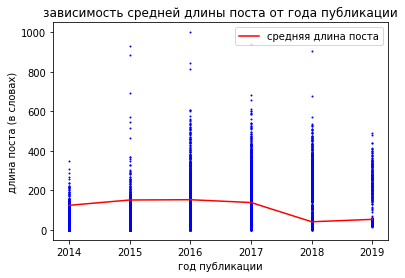

In [225]:
draw_plot(np.array(years), np.array(lengths), 'red', 'зависимость средней длины поста от года публикации',
         'средняя длина поста', 'год публикации', 'длина поста (в словах)')

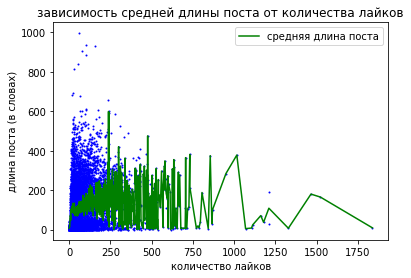

In [226]:
draw_plot(np.array(likes), np.array(lengths), 'green', 'зависимость средней длины поста от количества лайков',
         'средняя длина поста', 'количество лайков', 'длина поста (в словах)')

In [150]:
#если комментариев к посту не было, считаем их среднюю длину равной 0
train = np.array(meancomlengths)
train[np.isnan(train)]=0

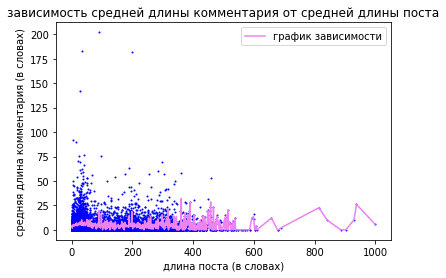

In [227]:
draw_plot(np.array(lengths), train, 'violet', 'зависимость средней длины комментария от средней длины поста',
         'график зависимости', 'длина поста (в словах)', 'средняя длина комментария (в словах)')

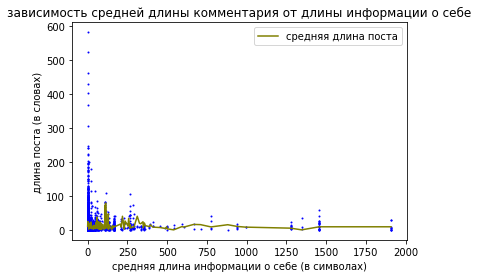

In [228]:
draw_plot(np.array(abouts)[np.array(abouts) != -1], np.array(comlengths)[np.array(abouts) != -1],
          'olive', 'зависимость средней длины комментария от длины информации о себе',
         'средняя длина поста', 'средняя длина информации о себе (в символах)', 'длина поста (в словах)')

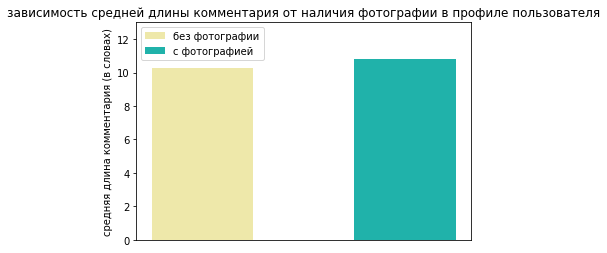

In [230]:
work_photos = np.array(photos)[np.array(photos) != 2]
work_comlengths = np.array(comlengths)[np.array(photos) != 2]
sort = list(set(work_photos))
ns = []
for y in set(work_photos):
    n = work_comlengths[work_photos==y].mean()
    ns.append(n)
no_photo, with_photo = plt.bar(sort, ns, width=0.5)
no_photo.set_facecolor('palegoldenrod')
with_photo.set_facecolor('lightseagreen')
no_photo.set_label('без фотографии')
with_photo.set_label('с фотографией')
plt.ylabel('средняя длина комментария (в словах)')
plt.ylim([0, 13])
plt.tick_params(axis='x',
                which='both',
                labelbottom=False,
                bottom=False,
                top=False)
plt.title('зависимость средней длины комментария от наличия фотографии в профиле пользователя')
plt.legend()
plt.savefig('graphs\зависимость средней длины комментария от наличия фотографии в профиле пользователя.png')

In [5]:
morph = pymorphy2.MorphAnalyzer()

In [24]:
stop_words = stopwords.words('russian')
unlemmatized_words = []
lemmatized_words = []
for path in ['.\posts', '.\comments']:
    for file in os.listdir(path):
        lemmatized_text = ''
        with open(os.path.join(path, file), encoding='utf-8') as f:
            text = f.read()
        words = splittext(text)
        for word in words:
            lemword = morph.parse(word)[0].normal_form
            lemmatized_text = lemmatized_text + lemword + ' '
            if word not in stop_words:
                unlemmatized_words.append(word)
            if lemword not in stop_words:
                lemmatized_words.append(lemword)
        savetext('lemmatized {}'.format(path[2:]), file[:-4], lemmatized_text)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [38]:
drops = ['-', '–', '1', '2', '3', '4', '5', '6', '7', '8', '9', '•']
freq_unlem = Counter(unlemmatized_words)
freq_lem = Counter(lemmatized_words)
for key in drops:
    freq_unlem.pop(key)
    freq_lem.pop(key)
most_unlem = freq_unlem.most_common(30)
most_lem = freq_lem.most_common(30)

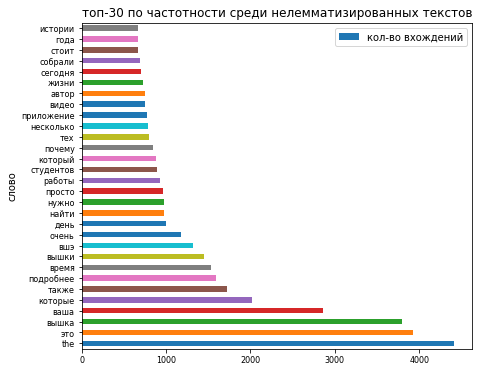

In [60]:
df = pd.DataFrame(most_unlem, columns = ['слово', 'кол-во вхождений'])
bars = df.plot(x='слово', y='кол-во вхождений', kind='barh', title='топ-30 по частотности среди нелемматизированных текстов',
              fontsize=8, figsize=(7,6))
fig = bars.get_figure()
fig.savefig('graphs\топ-30 по частотности среди нелемматизированных текстов')

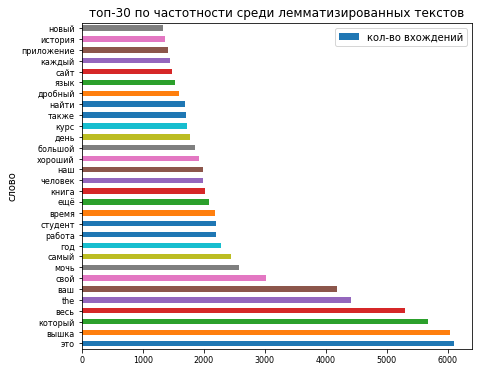

In [61]:
df = pd.DataFrame(most_lem, columns = ['слово', 'кол-во вхождений'])
bars = df.plot(x='слово', y='кол-во вхождений', kind='barh', title='топ-30 по частотности среди лемматизированных текстов',
              fontsize=8, figsize=(7,6))
fig = bars.get_figure()
fig.savefig('graphs\топ-30 по частотности среди лемматизированных текстов')

In [69]:
#у меня не установился wordcloud ни с Visual, ни с Build Tools, но, кажется, должно быть примерно так
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(freq_lem)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'